In [1]:
import pandas as pd # Librería para análisis de datos
import numpy as np # Librería para análisis numérico
import matplotlib.pyplot as plt # Librería para visualización


plt.style.use('seaborn-white') # Para configurar un estilo de gráfico

%matplotlib inline 


## Generar y visualizar datos

In [10]:
from sklearn import datasets, metrics

X, y = datasets.make_moons(n_samples=300, noise=0.4, random_state=5)

X_df = pd.DataFrame(X, columns = ['x1', 'x2'])
y_df = pd.DataFrame(y, columns = ['y'])

df = pd.concat([X_df, y_df], axis=1)

df.head(10)

,x1,x2,y
0,0.262478,1.122584,0
1,1.074165,-0.288157,1
2,1.308021,-0.152008,1
3,0.869056,-0.947307,1
4,1.074086,0.202270,0
5,2.540222,0.406503,1
6,1.386048,-0.439468,1
7,1.154520,-1.438662,1
8,1.000992,0.533347,0
9,2.374513,0.118426,1


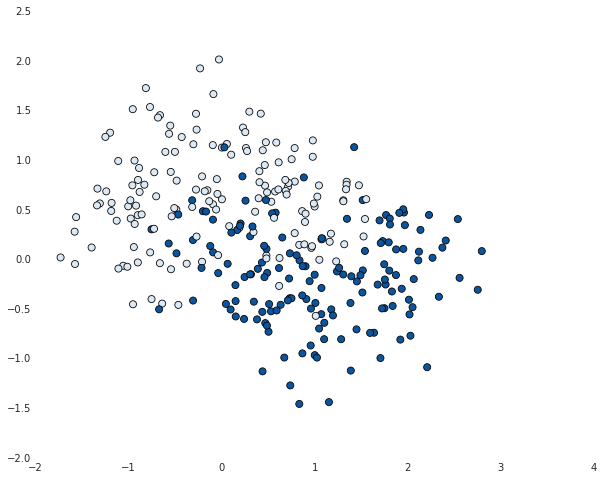

In [11]:
plt.figure(figsize=(10,8))
plt.rc('axes',edgecolor='w')
plt.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="Blues", vmin=-.2, vmax=1.2,
           edgecolor="k", linewidth=.8)
plt.show()

## Machine learning

In [12]:
# FUNCIONES

def ajuste_pred(algoritmo, x, y):
    """
    + input:
     |- algoritmo
     |- x: matriz de atributos
     |- y: vector de clases
        
    + output:
     |- clasificador ajustado
     |- predicciones: vector
     |- probabilidad de las predicciones: vector
     |- df: pandas DataFrame (objeto)
    
    """
    
    clf = algoritmo.fit(x, y)
    yPred = clf.predict(x)
    yProbs = clf.predict_proba(x)[:, 1]
    
    df = pd.DataFrame({
                        'y_real': y,
                        'yPred': yPred,
                        'yProb': yProbs
                      })
    
    return clf, yPred, yProbs, df


def plot_boundaries(clasificador, color='Reds'):
    """
    + input:
     |- clasificador
     |- color: mapa de colores (default: Reds)
     
    """
    
    xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    probs = clasificador.predict_proba(grid)[:, 1].reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, probs, 50, cmap=color,
                      vmin=0, vmax=1)

    plt.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap=color, vmin=-.2, vmax=1.2,
           edgecolor="k", linewidth=.8)
    
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.show()

    
def metricas(y, yPred):
    """
    + input:
     |- y: vector de clases reales
     |- yPred: vector de clases que ha generado el clasificador
        
    + output:
     |- conf_matrix: pandas DataFrame (objeto)
     |- report
    
    """
    
    conf_matrix = pd.DataFrame(metrics.confusion_matrix(y, yPred),
                               columns = ['Predice 0', 'Predice 1'],
                               index = ['Real 0', 'Real 1'])

    report = metrics.classification_report(y, yPred)
    
    print("Matriz de confusión:\n{0}\n\nMétricas:\n{1}".format(conf_matrix,report))
    
    return conf_matrix, report

In [13]:
# ALGORITMOS

from sklearn import linear_model, tree, ensemble

log_reg = linear_model.LogisticRegression(C=1e5)
dec_tree = tree.DecisionTreeClassifier(max_depth=5)
rand_forest = ensemble.RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
boost = ensemble.GradientBoostingClassifier(max_depth=5, n_estimators=10, max_features=1)

### Logistic Regression

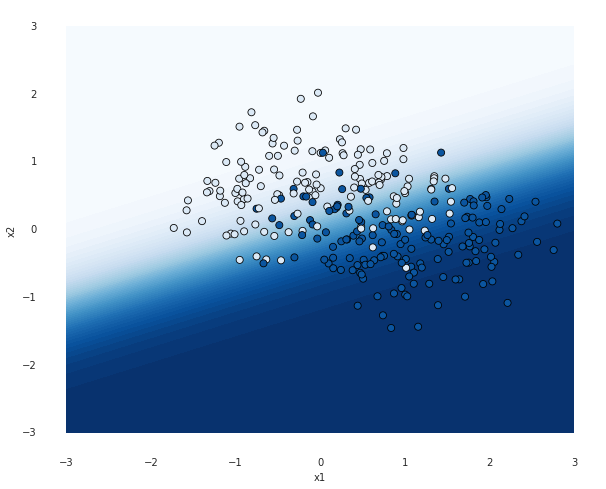

Matriz de confusión:
        Predice 0  Predice 1
Real 0        125         25
Real 1         25        125

Métricas:
             precision    recall  f1-score   support

          0       0.83      0.83      0.83       150
          1       0.83      0.83      0.83       150

avg / total       0.83      0.83      0.83       300



,yPred,yProb,y_real
0,0,0.041551,0
1,1,0.911496,1
2,1,0.899303,1
3,1,0.984732,1
4,1,0.685370,0


In [15]:
clf_lr, yPred_lr, yProbs_lr, df_lr = ajuste_pred(log_reg, X, y)
plot_boundaries(clf_lr, "Blues")
metricas(y,yPred_lr)
df_lr.head(5)

### Decision Tree

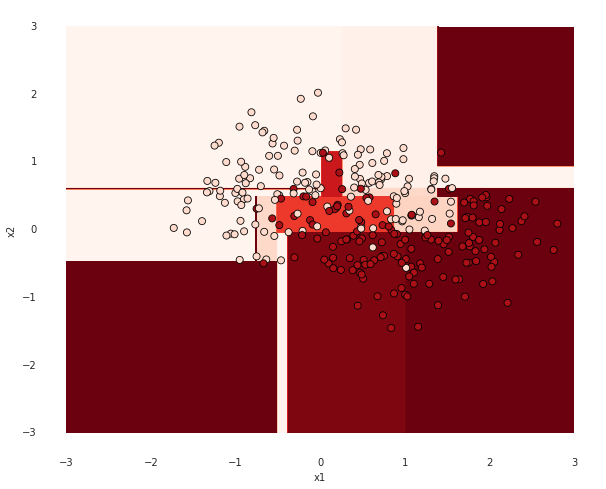

Matriz de confusión:
        Predice 0  Predice 1
Real 0        133         17
Real 1          6        144

Métricas:
             precision    recall  f1-score   support

          0       0.96      0.89      0.92       150
          1       0.89      0.96      0.93       150

avg / total       0.93      0.92      0.92       300



,yPred,yProb,y_real
0,0,0.031250,0
1,1,1.000000,1
2,1,1.000000,1
3,1,0.958333,1
4,0,0.176471,0


In [16]:
clf_dt, yPred_dt, yProbs_dt, df_dt = ajuste_pred(dec_tree, X, y)
plot_boundaries(clf_dt, "Reds")
metricas(y,yPred_dt)
df_dt.head(5)

### Random Forest

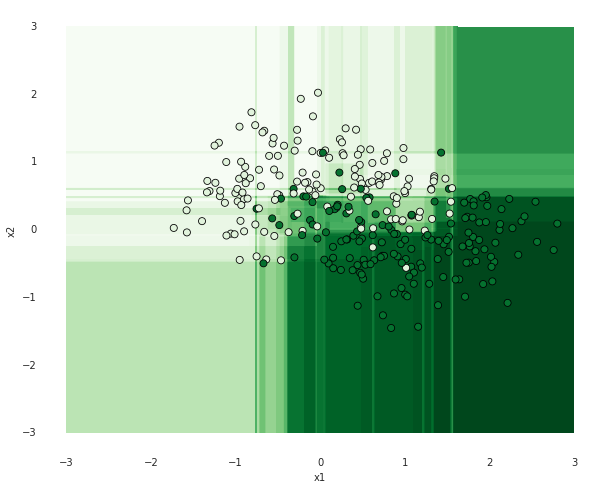

Matriz de confusión:
        Predice 0  Predice 1
Real 0        136         14
Real 1          9        141

Métricas:
             precision    recall  f1-score   support

          0       0.94      0.91      0.92       150
          1       0.91      0.94      0.92       150

avg / total       0.92      0.92      0.92       300



,yPred,yProb,y_real
0,0,0.182188,0
1,1,0.919250,1
2,1,0.938705,1
3,1,0.935606,1
4,0,0.345622,0


In [17]:
clf_rf, yPred_rf, yProbs_rf, df_rf = ajuste_pred(rand_forest, X, y)
plot_boundaries(clf_rf, "Greens")
metricas(y,yPred_rf)
df_rf.head(5)

### Gradient Boosting

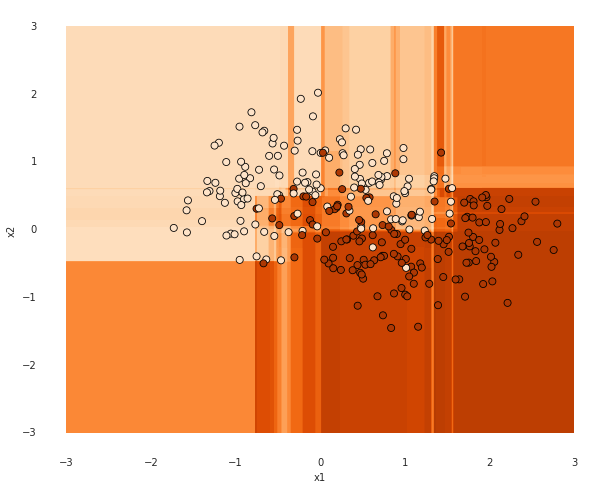

Matriz de confusión:
        Predice 0  Predice 1
Real 0        145          5
Real 1         11        139

Métricas:
             precision    recall  f1-score   support

          0       0.93      0.97      0.95       150
          1       0.97      0.93      0.95       150

avg / total       0.95      0.95      0.95       300



,yPred,yProb,y_real
0,0,0.292843,0
1,1,0.769792,1
2,1,0.801767,1
3,1,0.789535,1
4,0,0.341733,0


In [18]:
clf_gb, yPred_gb, yProbs_gb, df_gb = ajuste_pred(boost, X, y)
plot_boundaries(clf_gb, "Oranges")
metricas(y,yPred_gb)
df_gb.head(5)